In [97]:
import tensorflow as tf
import numpy as np
from numpy.random import seed


In [98]:
(xtrain1,ytrain1),(xtest1,ytest1)=tf.keras.datasets.cifar10.load_data()

In [99]:
(xtrain,ytrain),(xtest,ytest)=tf.keras.datasets.cifar100.load_data()

In [100]:
train_images, train_labels, test_images, test_labels = xtrain,ytrain,xtest,ytest

In [101]:
# shape of train and test image
print(f'Number of training examples{train_images.shape}')
print(f'Number of test examples{test_images.shape}')

Number of training examples(50000, 32, 32, 3)
Number of test examples(10000, 32, 32, 3)


In [102]:
train_labels.shape

(50000, 1)

In [103]:
import numpy as np 

# The labels are an array of integers, in the range [0, 9]. 
# These correspond to the class of clothing item the image represents:
labels = np.unique(test_labels)
print(labels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [104]:
# define model architecture
model = tf.keras.Sequential(
        [
        tf.keras.layers.Input(shape=(1024*3,)),
        tf.keras.layers.Dense(168, activation=tf.nn.relu),#activation
        tf.keras.layers.Dense(100, activation=tf.nn.softmax)])#sigmoid

In [105]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 168)               516264    
                                                                 
 dense_11 (Dense)            (None, 100)               16900     
                                                                 
Total params: 533,164
Trainable params: 533,164
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [107]:
train_images = train_images.reshape((50000, 32 * 32*3))
test_images = test_images.reshape((10000, 32 * 32 * 3))

# Normalize data to have feature values between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [108]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels_int = np.copy(test_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [109]:
train_images.shape

(50000, 3072)

In [110]:
train_labels.shape

(50000, 100)

In [111]:
History = model.fit(train_images, train_labels, validation_split=0.2, epochs=2)

Epoch 1/2
1250/1250 [==============================] - 5s 4ms/step - loss: 4.6106 - accuracy: 0.0110 - val_loss: 4.6116 - val_accuracy: 0.0106
Epoch 2/2
1250/1250 [==============================] - 4s 3ms/step - loss: 4.6118 - accuracy: 0.0104 - val_loss: 4.6128 - val_accuracy: 0.0094


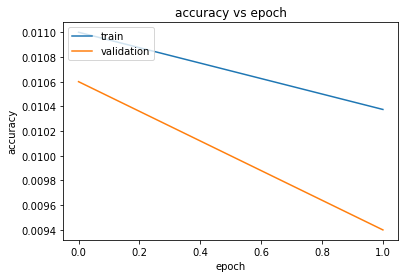

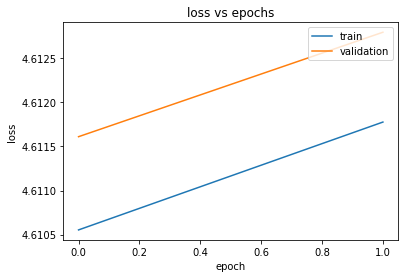

In [112]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('accuracy vs epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('loss vs epochs')# Let's plot the 


plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [113]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 4.6122 - accuracy: 0.0100


In [114]:
print('Accuracy on test dataset:', test_accuracy)

Accuracy on test dataset: 0.009999999776482582


In [115]:
test_images.shape

(10000, 3072)

In [116]:
predicted_classes = np.argmax(model.predict(test_images.reshape(-1,32*32*3)),axis=1)

#get true test_label
y_true=test_labels_int

# get the indices of correctly and incorrectly predicted test data points
correct_indices=np.nonzero(predicted_classes==y_true)[0]


incorrect_indices=np.nonzero(predicted_classes!=y_true)[0]

313/313 [==============================] - 0s 855us/step
